# BIG DATA ANALYTICS - Project - GROUP B

## Group Members

| Student Name | Student ID |
|----------|----------|
| Allyssa Sampath    | 816032362     |
| Avinash Roopnarine    | 816029635     |
| Jared Heeralal    | 816030252     |
| Kimberly Moses   | 816031494     |


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_excel('../Dataset/HR_Employee_Data.xlsx')

df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

In [ ]:
print(df['left'].value_counts())

#Cleaning

In [7]:
import sys
sys.path.insert(0, '../DataPreprocessing')
from data_cleaning import *

df = df.drop(['Emp_Id'], axis=1)

#One hot encode Department and salary
df = one_hot_encode(df)

In [ ]:
df.info()

A pairplot is a grid of scatterplots showing the relationship between pairs of variables in a dataset.

**Commented out below to reduce running time**

In [ ]:
# Perform exploratory data analysis (EDA)
# Visualize feature distributions and relationships

# sns.pairplot(df, diag_kind='kde', hue='left')
# plt.show()

# sns.pairplot(df, hue='left', palette='Set2')
# plt.show()

#K-Means for Employee Clustering

In [ ]:
# # Calculate and visualise correlation matrix
# correlation_matrix = df.corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

In [8]:
# top important features from feature importance
selected_features = ['satisfaction_level', 'number_project']

df_subset = df[selected_features]

print("DataFrame with Selected Features:")
df_subset.head()

DataFrame with Selected Features:


,satisfaction_level,number_project
0,0.38,2
1,0.80,5
2,0.11,7
3,0.72,5
4,0.37,2


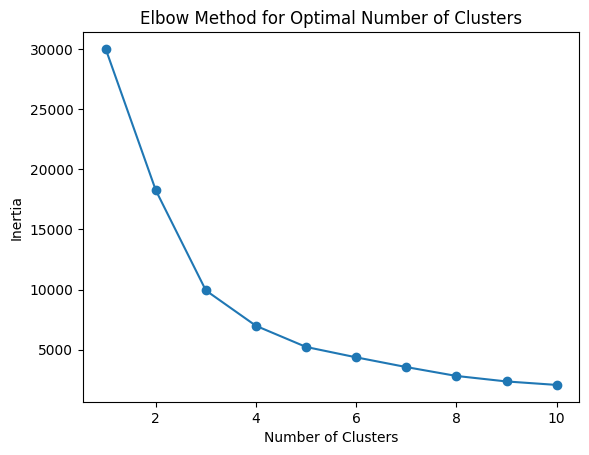

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_subset)


# Elbow method
inertia_values = []
num_clusters_range = range(1, 11)
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Print inertia values for each number of clusters
# print("Number of Clusters | Inertia")
# for num_clusters, inertia in zip(num_clusters_range, inertia_values):
#     print(f"{num_clusters:18d} | {inertia:.2f}")

plt.plot(num_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [10]:
## Identifying the Knee in the Elbow Plot with KneeLocator function

from kneed import KneeLocator
kl = KneeLocator(range(1,11), inertia_values, curve="convex", direction="decreasing")
print('The Knee located at figure:', kl.elbow)

The Knee located at figure: 3


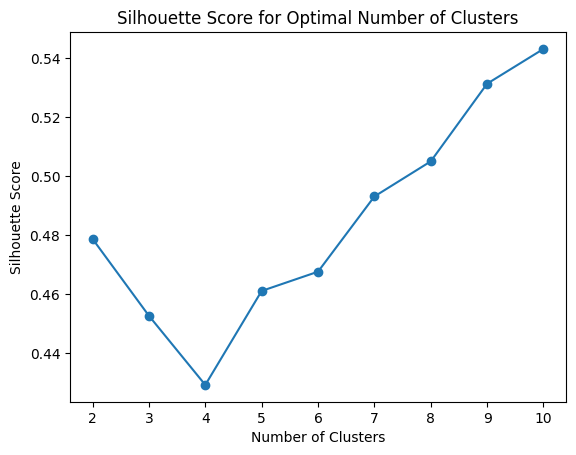

In [11]:
# Silhouette scores method
silhouette_scores = []
num_clusters_range = range(2, 11)
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

In [12]:
num_clusters = kl.elbow

kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', random_state=42, n_init=10)
kmeans.fit(scaled_features)


# Add cluster labels to DataFrame
df_subset['cluster'] = kmeans.labels_

# Analyze and interpret clusters
cluster_summary = df_subset.groupby('cluster')[selected_features].mean()
print("Cluster Summary:")
cluster_summary

Cluster Summary:


C:\Users\Kimberly\AppData\Local\Temp\ipykernel_17836\1466610683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['cluster'] = kmeans.labels_


,satisfaction_level,number_project
cluster,,
0,0.778451,4.026433
1,0.206014,5.565566
2,0.484957,2.498729


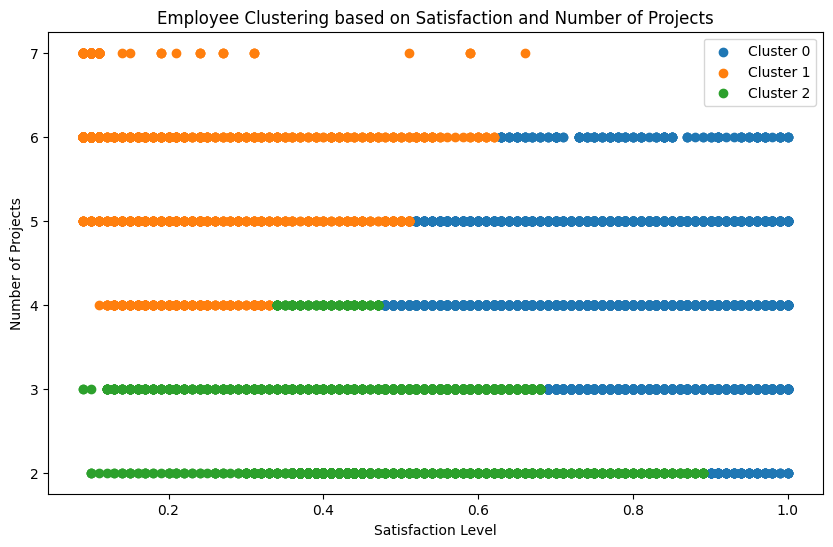

In [13]:
# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(df_subset[df_subset['cluster'] == cluster]['satisfaction_level'], df_subset[df_subset['cluster'] == cluster]['number_project'], label=f'Cluster {cluster}')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Projects')
plt.title('Employee Clustering based on Satisfaction and Number of Projects')
plt.legend()
plt.show()

**Cluster 0:**
- **Satisfaction Level**: The average satisfaction level for employees in Cluster 0 is relatively high, approximately 0.778.
- **Number of Projects**: On average, employees in Cluster 0 are involved in around 4.03 projects.

**Interpretation of Cluster 0:**
Employees in Cluster 0 exhibit high satisfaction levels and a moderate level of involvement in projects. This cluster likely represents a group of satisfied and productive employees who are engaged in their work and contribute to multiple projects.

**Cluster 1:**
- **Satisfaction Level**: The average satisfaction level for employees in Cluster 1 is relatively low, around 0.206.
- **Number of Projects**: On average, employees in Cluster 1 are involved in approximately 5.57 projects.

**Interpretation of Cluster 1:**
Employees in Cluster 1 have lower satisfaction levels compared to other clusters, and they are involved in a relatively high number of projects. This cluster may represent employees who are potentially overworked and dissatisfied with their workload, which could lead to decreased job satisfaction and potentially higher turnover rates.

**Cluster 2:**
- **Satisfaction Level**: The average satisfaction level for employees in Cluster 2 is moderate, around 0.485.
- **Number of Projects**: On average, employees in Cluster 2 are involved in approximately 2.50 projects.

**Interpretation of Cluster 2:**
Employees in Cluster 2 exhibit a moderate level of satisfaction, and they are involved in a relatively lower number of projects compared to other clusters. This cluster may represent employees who are moderately satisfied with their work and have a more manageable workload, allowing them to maintain a reasonable level of job satisfaction.


C:\Users\Kimberly\AppData\Local\Temp\ipykernel_17836\1253984806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(data=df_subset, x='cluster', palette='Set2')


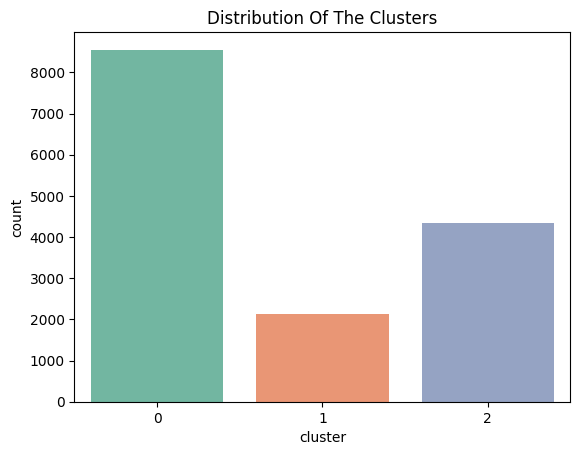

In [27]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(data=df_subset, x='cluster', palette='Set2')
pl.set_title("Distribution Of The Clusters")
plt.show()


# # Print count of each cluster
# for p in pl.patches:
#     print(f'Count: {p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()))


Over half of the employees appear to fall in cluster 0. 

Just over 2000 fall in cluster 1, and the remaining in cluster 2. 

Thus, the clusters seem to be unfairly distributed.

# Agglomorative Hierarchial Clustering

In [93]:
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc

norm = MinMaxScaler()

X_Hierar = norm.fit_transform(df_subset)
X_Hierar = pd.DataFrame(X_Hierar, columns=df_subset.columns)
print(X_Hierar.head(5))

   satisfaction_level  number_project  cluster
0            0.318681             0.0      1.0
1            0.780220             0.6      0.0
2            0.021978             1.0      0.5
3            0.692308             0.6      0.0
4            0.307692             0.0      1.0


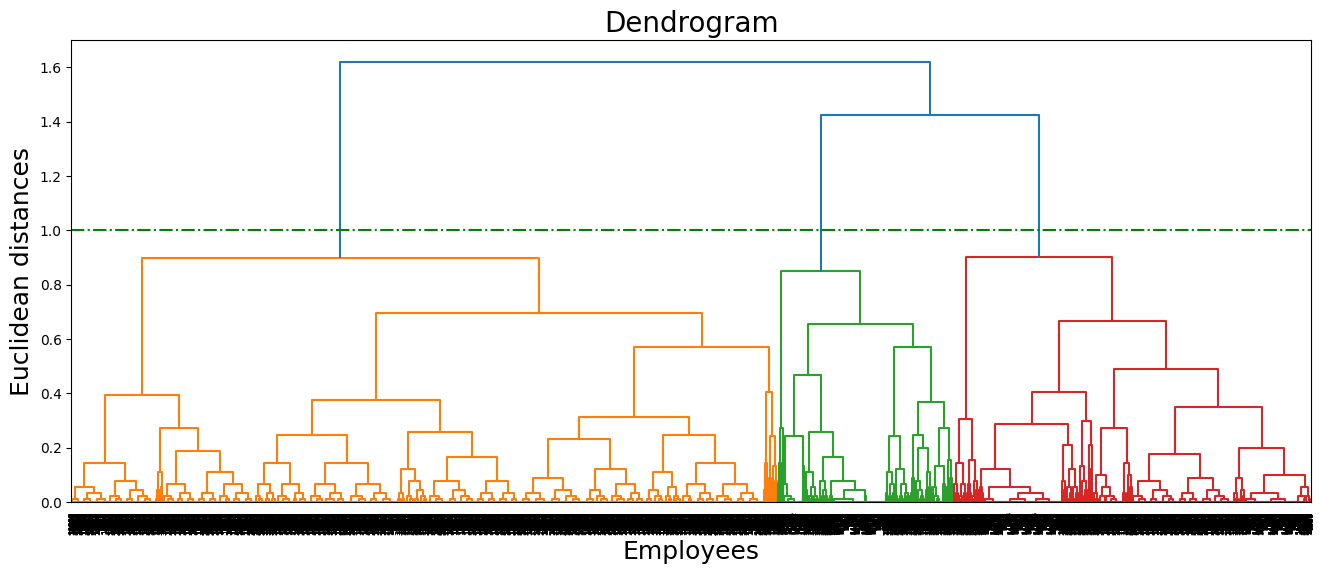

In [96]:
## Build dendrogram to find out the optimal number of clusters

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'complete'))
plt.axhline(y = 1, color = 'g', linestyle = 'dashdot')
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Employees', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

## complete linkage

In [ ]:
# (for complete)
# the threshold line intersects 3 vertical lines, hence we can conclude that the number of clusters we can have as 3
clusters = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_kmeans = clusters.fit_predict(X_Hierar)
y_kmeans

c:\Users\Kimberly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 2, ..., 0, 2, 0], dtype=int64)

In [ ]:
df_Hierar_complete = df_subset.copy()   ## making a copy of original dataframe
df_Hierar_complete['cluster'] = y_kmeans  ## appending the cluster column
print(df_Hierar_complete.head(5))

   satisfaction_level  number_project  cluster
0                0.38               2        0
1                0.80               5        1
2                0.11               7        2
3                0.72               5        1
4                0.37               2        0


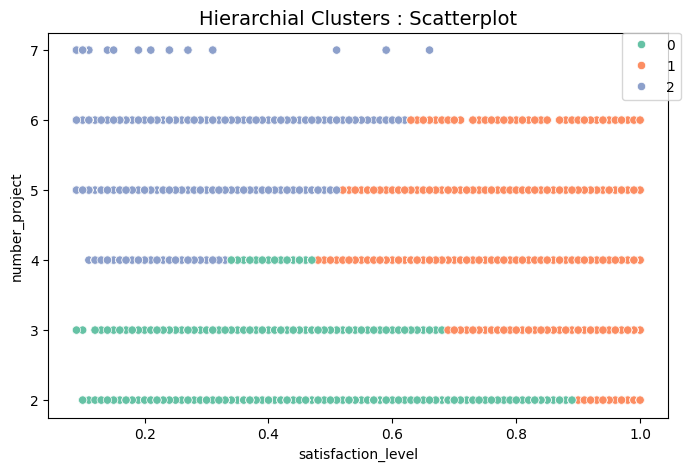

In [ ]:
## Visualising the new dataframe with cluster numbers through scatterplot

plt.figure(figsize=(8,5))
plt.title('Hierarchial Clusters : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Hierar_complete, x='satisfaction_level', y='number_project', hue='cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

In [ ]:
# Calculate summary statistics for each cluster
cluster_summary = df_Hierar_complete.groupby('cluster').mean()

# Print information about each cluster
for cluster_id, info in cluster_summary.iterrows():
    print(f"Cluster {cluster_id}:")
    print("------------------")
    print("Mean values:")
    print(info)
    print("\n")


Cluster 0:
------------------
Mean values:
satisfaction_level    0.484957
number_project        2.498729
Name: 0, dtype: float64


Cluster 1:
------------------
Mean values:
satisfaction_level    0.778451
number_project        4.026433
Name: 1, dtype: float64


Cluster 2:
------------------
Mean values:
satisfaction_level    0.206014
number_project        5.565566
Name: 2, dtype: float64




**Cluster 0:**
- **Mean Satisfaction Level**: 0.484957
- **Mean Number of Projects**: 2.498729

**Interpretation of Cluster 0:**
Employees in Cluster 0 have a moderate satisfaction level, averaging around 0.48, and are involved in an average of approximately 2.50 projects. This cluster likely represents a group of employees who are moderately satisfied with their work and have a relatively lighter workload compared to other clusters.

**Cluster 1:**
- **Mean Satisfaction Level**: 0.778451
- **Mean Number of Projects**: 4.026433

**Interpretation of Cluster 1:**
Employees in Cluster 1 exhibit a high satisfaction level, averaging around 0.78, and are involved in an average of approximately 4.03 projects. This cluster likely represents a group of highly satisfied and productive employees who are actively engaged in their work and contribute to multiple projects.

**Cluster 2:**
- **Mean Satisfaction Level**: 0.206014
- **Mean Number of Projects**: 5.565566

**Interpretation of Cluster 2:**
Employees in Cluster 2 have a relatively low satisfaction level, averaging around 0.21, and are involved in an average of approximately 5.57 projects. This cluster may represent employees who are potentially overworked and dissatisfied with their workload, which could lead to decreased job satisfaction and potentially higher turnover rates.


# Takeaway

- Both KMeans and Hierarchical Clustering techniques identified the same number of clusters.

- Although the cluster labels (numbers) differ between the two clustering techniques, the sizes of the clusters, as determined by their positions on the scatter plot, are largely consistent across both models.

- Both models reveal the following insights:

    - Employees with moderate job satisfaction levels tend to have lighter workloads.
  
    - Highly satisfied and productive employees are actively engaged in their work and contribute to multiple projects.
  
    - Employees experiencing potential work overload and dissatisfaction tend to have lower job satisfaction.


In [1]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df_Hierar_complete["clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

NameError: name 'sns' is not defined

# extras

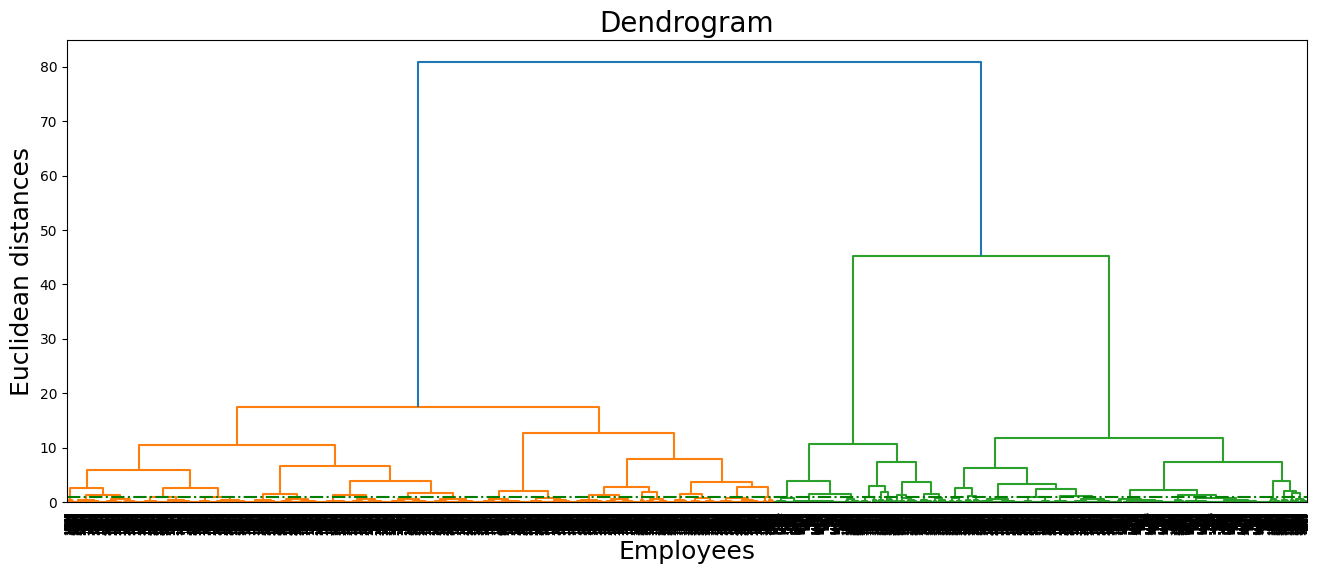

In [94]:
## Build dendrogram to find out the optimal number of clusters

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.axhline(y = 1, color = 'g', linestyle = 'dashdot')
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Employees', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

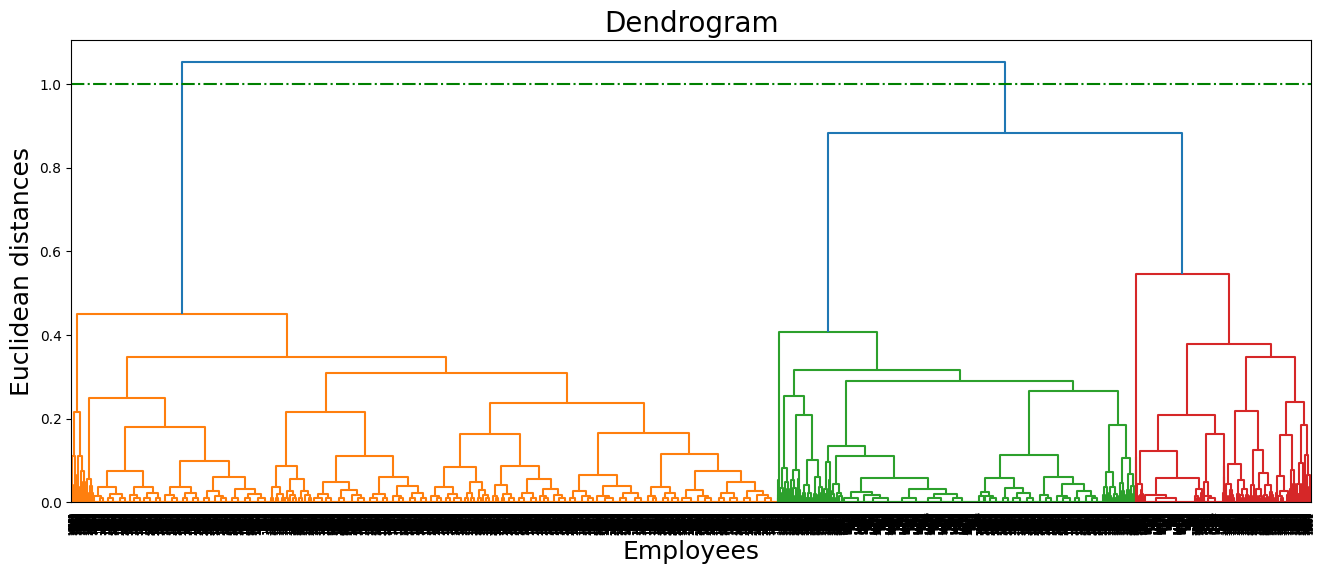

In [95]:
## Build dendrogram to find out the optimal number of clusters

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'average'))
plt.axhline(y = 1, color = 'g', linestyle = 'dashdot')
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Employees', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

## average linkage

In [97]:
from sklearn.cluster import AgglomerativeClustering

# (for average)
# the threshold line intersects 2 vertical lines, hence we can conclude that the number of clusters we can have as 2
clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
y_kmeans = clusters.fit_predict(X_Hierar)
y_kmeans

c:\Users\Kimberly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
df_Hierar = df_subset.copy()   ## making a copy of original dataframe
df_Hierar['cluster'] = y_kmeans  ## appending the cluster column
print(df_Hierar.head(5))

   satisfaction_level  number_project  cluster
0                0.38               2        0
1                0.80               5        1
2                0.11               7        0
3                0.72               5        1
4                0.37               2        0


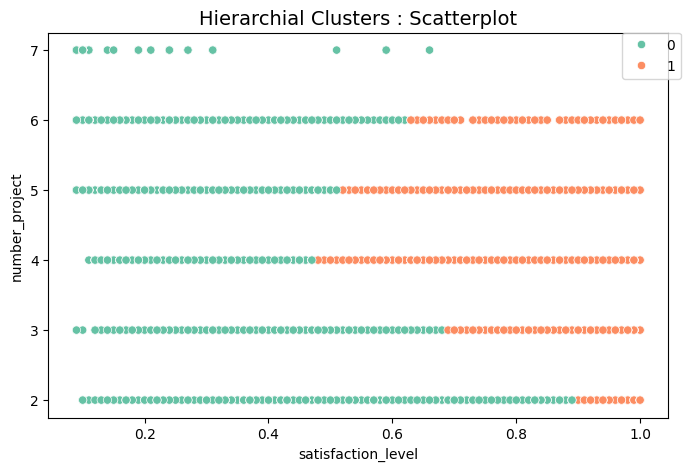

In [99]:
## Visualising the new dataframe with cluster numbers through scatterplot

plt.figure(figsize=(8,5))
plt.title('Hierarchial Clusters : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Hierar, x='satisfaction_level', y='number_project', hue='cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

In [100]:
# Calculate summary statistics for each cluster
cluster_summary = df_Hierar.groupby('cluster').mean()

# Print information about each cluster
for cluster_id, info in cluster_summary.iterrows():
    print(f"Cluster {cluster_id}:")
    print("------------------")
    print("Mean values:")
    print(info)
    print("\n")

# Additionally, you can print more specific information or insights based on the characteristics of each cluster


Cluster 0:
------------------
Mean values:
satisfaction_level    0.393259
number_project        3.506900
Name: 0, dtype: float64


Cluster 1:
------------------
Mean values:
satisfaction_level    0.778451
number_project        4.026433
Name: 1, dtype: float64




**Cluster 0:**
- **Mean Satisfaction Level**: 0.393259
- **Mean Number of Projects**: 3.506900

**Interpretation of Cluster 0:**
Employees in Cluster 0 have a moderate satisfaction level, averaging around 0.39, and are involved in an average of approximately 3.51 projects. This cluster likely represents a group of employees who are moderately satisfied with their work and moderately engaged in their projects.

**Cluster 1:**
- **Mean Satisfaction Level**: 0.778451
- **Mean Number of Projects**: 4.026433

**Interpretation of Cluster 1:**
Employees in Cluster 1 exhibit a high satisfaction level, averaging around 0.78, and are involved in an average of approximately 4.03 projects. This cluster likely represents a group of highly satisfied and productive employees who are actively engaged in their work and contribute to multiple projects.


## complete linkage

In [101]:
# (for complete)
# the threshold line intersects 3 vertical lines, hence we can conclude that the number of clusters we can have as 3
clusters = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_kmeans = clusters.fit_predict(X_Hierar)
y_kmeans

c:\Users\Kimberly\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 2, ..., 0, 2, 0], dtype=int64)

In [102]:
df_Hierar_complete = df_subset.copy()   ## making a copy of original dataframe
df_Hierar_complete['cluster'] = y_kmeans  ## appending the cluster column
print(df_Hierar_complete.head(5))

   satisfaction_level  number_project  cluster
0                0.38               2        0
1                0.80               5        1
2                0.11               7        2
3                0.72               5        1
4                0.37               2        0


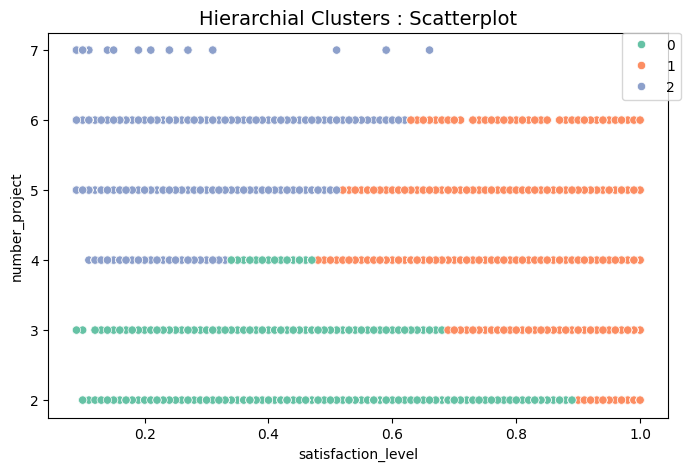

In [103]:
## Visualising the new dataframe with cluster numbers through scatterplot

plt.figure(figsize=(8,5))
plt.title('Hierarchial Clusters : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Hierar_complete, x='satisfaction_level', y='number_project', hue='cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

In [105]:
# Calculate summary statistics for each cluster
cluster_summary = df_Hierar_complete.groupby('cluster').mean()

# Print information about each cluster
for cluster_id, info in cluster_summary.iterrows():
    print(f"Cluster {cluster_id}:")
    print("------------------")
    print("Mean values:")
    print(info)
    print("\n")

# Additionally, you can print more specific information or insights based on the characteristics of each cluster


Cluster 0:
------------------
Mean values:
satisfaction_level    0.484957
number_project        2.498729
Name: 0, dtype: float64


Cluster 1:
------------------
Mean values:
satisfaction_level    0.778451
number_project        4.026433
Name: 1, dtype: float64


Cluster 2:
------------------
Mean values:
satisfaction_level    0.206014
number_project        5.565566
Name: 2, dtype: float64




**Cluster 0:**
- **Mean Satisfaction Level**: 0.484957
- **Mean Number of Projects**: 2.498729

**Interpretation of Cluster 0:**
Employees in Cluster 0 have a moderate satisfaction level, averaging around 0.48, and are involved in an average of approximately 2.50 projects. This cluster likely represents a group of employees who are moderately satisfied with their work and have a relatively lighter workload compared to other clusters.

**Cluster 1:**
- **Mean Satisfaction Level**: 0.778451
- **Mean Number of Projects**: 4.026433

**Interpretation of Cluster 1:**
Employees in Cluster 1 exhibit a high satisfaction level, averaging around 0.78, and are involved in an average of approximately 4.03 projects. This cluster likely represents a group of highly satisfied and productive employees who are actively engaged in their work and contribute to multiple projects.

**Cluster 2:**
- **Mean Satisfaction Level**: 0.206014
- **Mean Number of Projects**: 5.565566

**Interpretation of Cluster 2:**
Employees in Cluster 2 have a relatively low satisfaction level, averaging around 0.21, and are involved in an average of approximately 5.57 projects. This cluster may represent employees who are potentially overworked and dissatisfied with their workload, which could lead to decreased job satisfaction and potentially higher turnover rates.
